# ML - Logistic Regression

<a id='content'></a>

## Content


### [Logistic Regression Overview](#1)

### [Logistic Regression Codes](#2)

### [Compare with Scikit-learn implementation](#3)

### [References](#refs)

### [Next steps](#next_steps)

### [Curiosities](#curiosities)

___

<a id='1'></a>

# [^](#content) Logistic Regression Notes
___

<div style="text-align: center;">
  <img src="../images/logistic_reg1.png" height="85%" width="85%">
</div>

<div style="text-align: center;">
  <img src="../images/logistic_reg2.png" height="88%" width="88%">
</div>

<div style="text-align: center;">
  <img src="../images/logistic_reg3.png" height="85%" width="85%">
</div>

<a id='2'></a>

# [^](#content) Logistic Regression Codes
___

## Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore') # suppress warnings

# parameters for graphic configurations
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Define functions

In [2]:
def plot_data(x, y, label_x, label_y):
    plt.figure(figsize=(20, 7), dpi=80)
    plt.scatter(x, y, color='orange', alpha=0.2)
    plt.plot(x, y, color='black', linewidth=4)        
    plt.xlabel(label_x, fontsize=16)
    plt.ylabel(label_y, fontsize=16)    
    plt.show()    
    

def feature_normalize(x):
    '''
    Standard normalization:
    x_norm, mu, sigma = feature_normalize(x),
    where mu = 'mean of x' = 0, sigma = 'standard_deviation of x' = 1,
    and x_norm = 'normalized x'    
    '''        
    
    mu = []
    sigma = []

    for i in range(x.shape[1]):        
        mu.append(np.mean(x[:, i]))
        sigma.append(np.std(x[:, i]))
        with np.errstate(invalid='ignore'):
            if i == 0:
                x_norm = (x[:, i] - mu[i])/sigma[i]
            else:
                x_norm = np.column_stack((x_norm, (x[:, i] - mu[i])/sigma[i]))
    
    return x_norm, mu, sigma                  


def sigmoid(z):
    '''
    Compute sigmoid function.
    g = sigmoid(z) computes the sigmoid of z    
    '''
    
    g = 1 / (1 + np.exp(-z))
    
    return g


def compute_cost(x, y, theta):
    ''' 
    Compute cost for linear regression:
    j_cost = compute_cost(x, y, theta)
    '''

    # number of training examples
    m = len(y)

    # compute cost
    h = sigmoid(np.dot(x, theta))
    
    j_cost = -1/m * (np.dot(y, np.log(h)) + np.dot((1-y), np.log(1-h)))

    return j_cost


def gradient_descent(x, y, theta, alpha, num_iters):
    '''
    Performs gradient descent to learn theta: 
    theta, j_history = gradient_descent(x, y, theta, alpha, num_iters)    
    '''

    # number of training examples
    m = len(y)    
    
    # store cost values
    j_history = []

    # performs the iterative process
    for iteration in range(1, num_iters):
        # vectorized gd
        h = sigmoid(np.dot(x, theta))
        theta = theta - alpha/m * np.dot((h - y), x)
        
        # save the cost j_cost in every iteration    
        j_history.append(compute_cost(x, y, theta))
    
    return theta, j_history

## Train and test model

### About the dataset

The file dataset (`ex2data1.txt`) contains the training set for the logistic regression model to predict whether a student will be admitted into a university, based on the scores of your two exams.

### Feature Normalization

In [3]:
# load data
FILE_PATH = '../data/ex2data1.txt'
data = np.loadtxt(FILE_PATH, delimiter=',')

x = data[:, 0:2]
y = data[:, 2]
m = len(y)

# some samples and targets
print('First 4 examples from the dataset:')
print(f'x = {x[0:4,:]},\ny = {y[0:4]}\n')

# scale features
normalize = True
if normalize:
    x_norm, mu, sigma = feature_normalize(x)

    # some checks
    print('Means after normalization:')
    print(np.mean(x_norm[:, 0]))
    print(np.mean(x_norm[:, 1]))

    print('\nStandard deviation afetr normalization:')
    print(np.std(x_norm[:, 0]))
    print(np.std(x_norm[:, 1]))
else:
     x_norm = x

# add intercep term
x_norm = np.column_stack((np.ones((len(x), )), x_norm))
print(f'\nx_norm = {x_norm[:4,:]}')



First 4 examples from the dataset:
x = [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]],
y = [0. 0. 0. 1.]

Means after normalization:
-7.66053886991358e-17
1.1102230246251565e-15

Standard deviation afetr normalization:
1.0
1.0

x_norm = [[ 1.         -1.60224763  0.63834112]
 [ 1.         -1.82625564 -1.2075414 ]
 [ 1.         -1.53903969  0.3612943 ]
 [ 1.         -0.28210129  1.0863683 ]]


### Run Logistic Regression with Gradient Descent

Theta computed from gradient descent: [0.46715425 1.28549456 1.15267245]


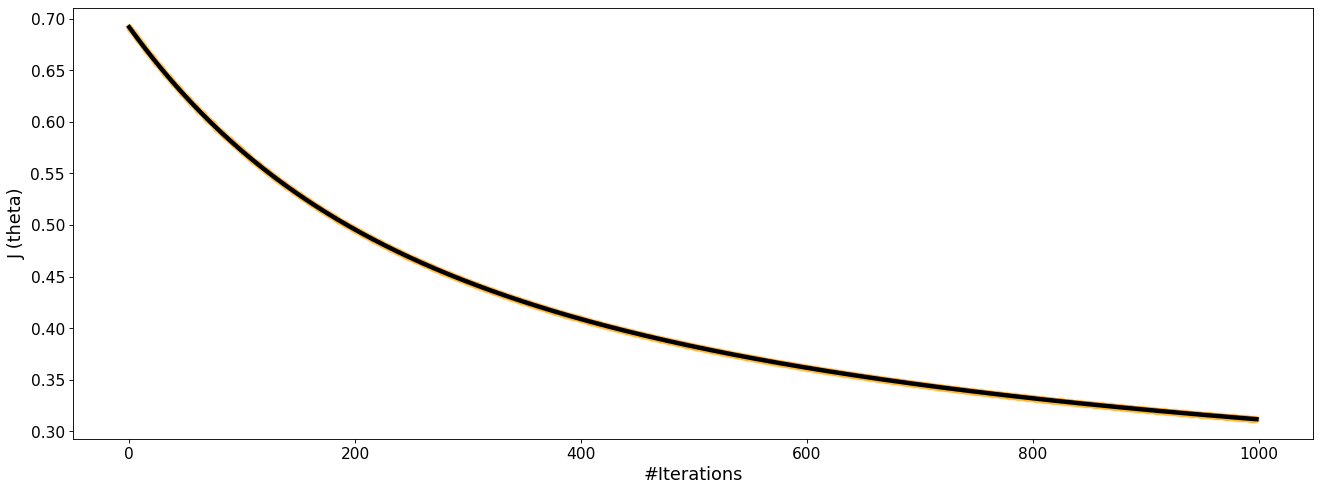

In [4]:
# choose some alpha value
alpha = 0.01;
num_iters = 1000;

# init 'theta' and run gradient descent 
theta = np.zeros((3,))
theta_optimal, j_history = gradient_descent(x_norm, y, theta, alpha, num_iters)

# gradient descent's result
print(f'Theta computed from gradient descent: {theta_optimal}')

# plot the convergence graph
x_axis = np.arange(0,len(j_history))
plot_data(x=x_axis, y=j_history, label_x='#Iterations', label_y='J (theta)')

<a id='3'></a>

# [^](#content) Compare with Scikit-learn implementation
___

### Fit data with sklearn logistic regression and make predict

In [5]:
model = LogisticRegression()
model.fit(x_norm, y)

pred_sklearn = model.predict(x_norm)

pred_sklearn

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

### Make predict with our implementation

In [6]:
pred = [1 if i > 0.5 else 0 for i in sigmoid(np.dot(x_norm, theta_optimal))]
print(pred)

[0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1]


### Difference between predict with Sklearn and with our implementation

In [7]:
print('Difference: ', sum(pred_sklearn - pred))
pred_sklearn - pred

Difference:  1.0


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

<a id='refs'></a>

# [^](#content) References

* Coursera - ML Course, 2019.

* Wikipedia:
    - Gradient Descent, [link](https://en.wikipedia.org/wiki/Gradient_descent), 2022.
    - Logistic Regression, [link](https://en.wikipedia.org/wiki/Logistic_regression), 2022.


<a id='next_steps'></a>

# [^](#content) Next steps


- Traninig and make prediction with others datasets
 
- Improve optimization step

- Add some graphs of boundaries
